# Lab 1: River Discharge
---

The computing assignment today is intended to give you some practice with Python. In particular, the Python skills you will work with are:

1. Manipulating data in arrays
2. Plotting
3. Calculating numerical integrations
4. Introduction to some common Python packages: [NumPy](https://numpy.org/) (providing $n$-dimensional arrays and numerical computing tools), [SciPy](https://www.scipy.org/) (numerical tools, signal processing, statistics, optimization, ...), and [Matplotlib](https://matplotlib.org/) (plotting, with commands very similar to MATLAB). 

## Calculating River Discharge from Field Data

River discharge is defined as the volume of water passing through a cross section at a certain time. It has units of $\text{m}^3~\text{s}^{-1}$ and ranges from $1~\text{m}^3~\text{s}^{-1}$ for a small alpine stream to over $200000~\text{m}^3~\text{s}^{-1}$ for the Amazon. Calculating the discharge of a river is relatively simple in theory, but you do have to be careful in collecting and dealing with real data!

<img src="https://raw.githubusercontent.com/uafgeoteach/GEOS631_FoG/master/labs/lab_01/riverdiagram.png" width=500/>
<div style="text-align:right"><em>Image courtesy Erin Pettit, OSU</em></div>

In order to measure river discharge, we could measure volume somehow (buckets?) and count the number of buckets we fill in a certain amount of time. This would work for measuring the discharge out of your kitchen faucet, but it doesn't really work for a real river. The alternative is to look at the units of Volume / Time and realize that it is the same as Area $\times$ Velocity:

$$\frac{\text{m}^3}{\text{s}} = \text{m}^2 \times \frac{\text{m}}{\text{s}}\,,$$

or

$$Q = Av\,.$$

This means we can measure the cross sectional area of a point on the river (where the bridge crosses, for example) and then measure the velocity of the water going through that cross sectional area.

How do we do this?

1. Given depth measurements, we estimate the cross sectional area.
2. Given point velocity measurements we estimate the velocity of the whole cross section

It is not as easy as it sounds to do this in real life, so we have to make some assumptions.

## Plotting the Data

For the first calculations we have given you a nicely gridded data set.

1. We have given you some data in a `riverdata.npz` file. Download it from GitHub by running the following cell. This will place the downloaded file in your working directory.

In [1]:
!curl -O https://raw.githubusercontent.com/uafgeoteach/GEOS631_FoG/master/labs/lab_01/riverdata.npz
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1613  100  1613    0     0  35357      0 --:--:-- --:--:-- --:--:-- 35844
lab_01_name.ipynb  riverdata.npz  riverdiagram.png  velocitydiagram.png


2. The commands below will open the river data, it has in it variables:
- `x` — x position across the river (m)
- `rdepth` — depth at each x position (m)
- `surfvel` — surface velocity measurements for each x position (m/s)

In [2]:
import numpy as np

riverdata = np.load('riverdata.npz')

x = riverdata['x']
rdepth = riverdata['rdepth']
surfvel = riverdata['surfvel']

3. Start by just plotting these variables to see what this looks like. Note that depths are positive, so to see it as "river" you have to make the depths negative when you plot it.

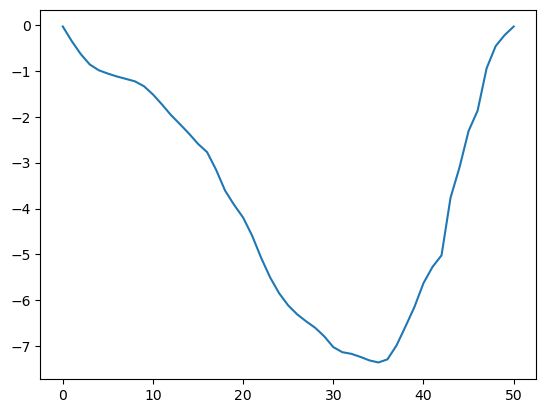

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, -rdepth);

4. If you want to see the actual data points, rather than just a line, you can add them. The `'xk'` tells it to use an "x" to mark the data point and to use the color "k", which is black. Put `fig` on a blank line to show the updated figure.

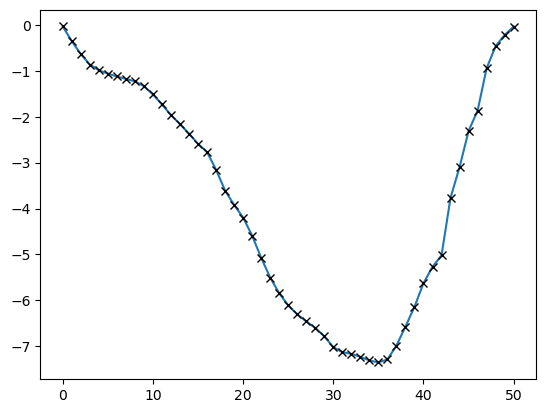

In [4]:
ax.plot(x, -rdepth, 'xk')
fig

5. You can adjust the colors and line with and everything on the plot using various commands. See the documentation for [`Axes.plot()`](https://matplotlib.org/2.0.2/api/_as_gen/matplotlib.axes.Axes.plot.html).

6. To add labels use:

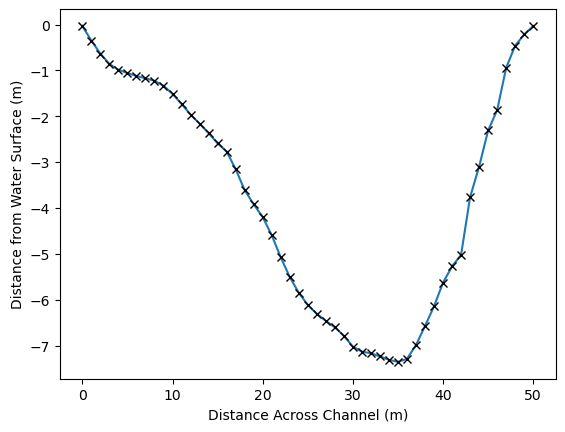

In [5]:
ax.set_xlabel('Distance Across Channel (m)')
ax.set_ylabel('Distance from Water Surface (m)')
fig

7. You can also add a grid:

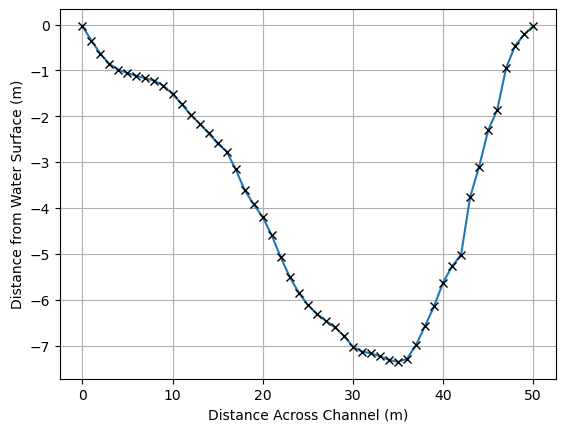

In [6]:
ax.grid(True)
fig

And you can change the ticks and grid to show every 5 m section of this river cross section if you want. In this case `ax.set_xticks()` sets the $x$-axis ticks for the current figure, and `np.arange(0, 50 + 5, 5)` creates an array which ranges from 0 (inclusive) to 55 (exclusive), with increments of 5. This results in an array `[0, 5, 10, ... , 45, 50]` for the ticks.

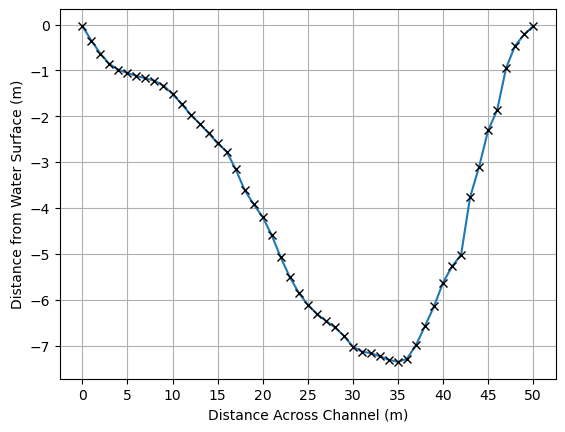

In [7]:
ax.set_xticks(np.arange(0, 50 + 5, 5));
fig

## <span style="color:green">Question 1</span>

Plot the surface velocity data in a similar manner to the above on a new figure. To do this, **make a new code cell below** and write the relevant commands there, then run the cell. Note that the import commands above (e.g., `import numpy as np`) only need to be run once, so you can leave those out.

## <span style="color:green">Question 2</span>

*Answer before proceeding!* Given the two datasets, how would you go about estimating the discharge? What else do you need to know? How do you think you might approach this numerically in Python (you don't need to know the perfect syntax here, we just want to you write down the steps you think you would use). Answer in a **new text cell below**.

## Calculate Cross Sectional Area Given Gridded Data

For this first assignment, we're going to mostly walk you through most of the steps; there are always multiple ways to do something, so if you have an idea on how to do it, then go for it!

There are multiple ways to do numerical integration. The simplest is to assume each depth measurement applies to a column of water that, in this case, is 1 meter wide (we have a measurement every meter). Consider a channel of width $W$ with a depth profile $d(x)$ which smoothly varies with position $x$. Say we measured the profile at $N$ evenly-spaced locations. Then we can approximate the integral with

$$\int_0^W d(x)\,\mathrm{d}x \approx \sum_{i = 0}^{N-1} d_i\Delta x\,,$$

where $d_i$ is the depth at position $i$. **Note that we start indexing at 0 — this is Python convention!** Since the data are evenly spaced, to find $\Delta x$ you can use:

In [8]:
dx = x[1] - x[0]

An alternative you can use is `diffx = np.diff(x)`, which will give you the difference between every two points (try it, but then to use it you need use just one element `dx = diffx[0]`). Then:

In [9]:
column_area = dx * rdepth
total_area_column = sum(column_area)

This can be inaccurate, however, depending on the data set. Basically it is drawing columns that look like this:

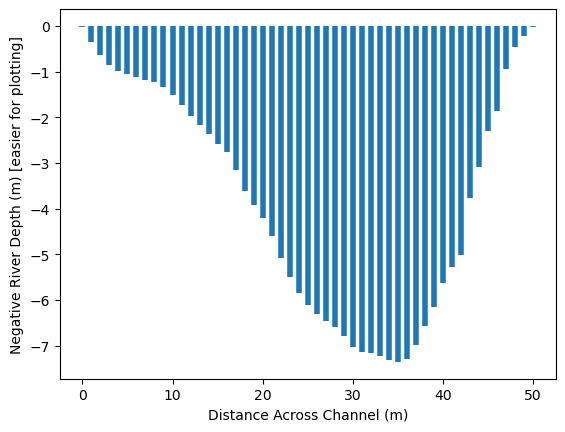

In [10]:
fig, ax = plt.subplots()
ax.vlines(x, -rdepth, [0], linewidths=4)
ax.set_xlabel('Distance Across Channel (m)')
ax.set_ylabel('Negative River Depth (m) [easier for plotting]');

A more accurate way to this is to use trapezoids instead of squares. [NumPy](https://numpy.org/) has a nice function to do this:

In [11]:
trap_area = np.trapz(x=x, y=rdepth)

Or, alternatively:

In [12]:
from scipy.integrate import cumtrapz

area_cumtrapz = cumtrapz(x=x, y=rdepth)
total_area_cumtrapz = area_cumtrapz[-1]

Look at the results from `trapz` and `cumtrapz` to see what it is doing differently. Try looking at the "docstring" — the function documentation — online. You can also view it within the notebook by typing a `?` after the function name, e.g. `np.trapz?`.

## <span style="color:green">Question 3</span>

Compare your answers from the column approach versus the trapezoid approach. What are the values? Are they similar? What shape of profile do you think would make the results of the two methods more different? Would it matter more or less if you had fewer than 51 data points? Answer in a **new text cell below**.

## Calculate Average Velocity

Average velocity is a bit trickier because we only have surface velocity to work with. You will learn how to calculate this later in the semester, but for now, we will assume that the river has a parabolic velocity profile. The velocity is zero at the river bottom (where the water and river meet, there is a lot of friction and we consider this a "no slip" boundary) and the river is moving fastest at the top. It is also moving fastest in approximately the middle of the channel when viewed from above, as you see from the data you plotted. The velocity profile looks like this:

<img src="https://raw.githubusercontent.com/uafgeoteach/GEOS631_FoG/master/labs/lab_01/velocitydiagram.png" width=500/>
<div style="text-align:right"><em>Image courtesy Erin Pettit, OSU</em></div>

And the equation is:

$$v(z) = kz(2H - z)\,,$$

where $z=0$ is the bottom and $z = H$ is the top of the water, and $k$ is a coefficient that describes the water properties. You will learn how to derive this equation later in the semester.

## <span style="color:green">Question 4</span>

Consider the vertical velocity profile described by the equation for $v(z)$ above. Derive an expression for the analytical average velocity of this profile. Answer in a **new text cell below**.

## Submission

That's all for today's lab. Please save this file (with your additional answer cells included!), download it (**File $\rightarrow$ Download .ipynb**), and upload to Canvas.